In [127]:
import os
import pandas as pd
import xlrd

def leer_precios(filename):
    df = pd.read_excel(filename)
    for index, row in df.iterrows():
        if (row[0] == 'Fecha'):
            x = index + 1
            df = pd.read_excel(filename, skiprows = x, usecols = list(range(26)))
            break
    df
    
    return df


path = '.'
files = os.listdir(path)
# x = !ls precios/ 
files = [i for i in files if '.xls' in i]
y = 0
dfs = []
for i in files:
    df = pd.read_excel(i)
    dfs.append(leer_precios(i))
dfs

[          Fecha        0        1        2        3        4        5  \
 0    1995-07-20      NaN    1.073    1.073    1.073    1.073    1.073   
 1    1995-07-21    1.073    1.000    1.000    1.000    1.000    1.000   
 2    1995-07-22    1.073    1.073    1.000    1.000    1.000    1.073   
 3    1995-07-23    1.073    1.000    1.000    1.000    1.000    1.000   
 4    1995-07-24    1.000    1.000    0.990    1.000    1.000    1.073   
 5    1995-07-25    0.990    0.990    0.989    0.990    0.990    1.073   
 6    1995-07-26    0.500    0.500    0.500    0.500    0.500    0.990   
 7    1995-07-27    0.500    0.500    0.500    0.500    0.500    0.500   
 8    1995-07-28    0.000    0.000    0.000    0.000    0.000    0.463   
 9    1995-07-29    1.000    1.000    0.000    0.000    1.000    0.000   
 10   1995-07-30    1.072    1.000    0.000    0.000    0.000    0.000   
 11   1995-07-31    0.000    0.000    0.000    0.000    0.000    1.000   
 12   1995-08-01    0.000    0.000    

In [128]:
for i in dfs:
    if 'Version' in i.columns.values:
        del i['Version']
    print(i.columns.values)
df = pd.concat(dfs)
df.shape

['Fecha' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23']
['Fecha' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23']
['Fecha' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23']
['Fecha' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23']
['Fecha' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23']
['Fecha' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23']
['Fecha' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23']
['Fecha' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23']
['Fecha' '0' '1' '2' '3' '4' '5'

(8409, 25)

In [129]:
df = pd.melt(df, id_vars='Fecha')

In [130]:
# 1.-- Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la 
# tabla de tal forma que quede con las columnas Fecha, Hora y Precio (únicamente tres columnas).

df.columns = ['Fecha', 'Hora', 'Precio']
print(df.shape)

(201816, 3)


In [131]:
# 2.-- Compute e imprima el número de registros con datos faltantes.
# sum(df.isnull().values.ravel()) Número de celdas con valroe nulos
# sum([True for idx,row in df.iterrows() if any(row.isnull())]) Número de filas con valores nulos

filtered_df = df[df['Precio'].notnull()]
print(df.shape[0] - filtered_df.shape[0])

238


In [132]:
# **3.--** Compute e imprima el número de registros duplicados.
duplicates_out_df = df.copy()
duplicates_out_df = duplicates_out_df.drop_duplicates()
print(df.shape[0] - duplicates_out_df.shape[0])

1951


In [133]:
#4.-- Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan 
# (registros completos).

df = df[df['Precio'].notnull()]
df = df.drop_duplicates()
print(df.shape[0])
df

199819


,Fecha,Hora,Precio
1,1995-07-21,0,1.073000
2,1995-07-22,0,1.073000
3,1995-07-23,0,1.073000
4,1995-07-24,0,1.000000
5,1995-07-25,0,0.990000
6,1995-07-26,0,0.500000
7,1995-07-27,0,0.500000
8,1995-07-28,0,0.000000
9,1995-07-29,0,1.000000
10,1995-07-30,0,1.072000


Fecha
1996-02-01 00:00:00     13.903167
1996-02-02 00:00:00     13.559000
1996-02-03 00:00:00     14.524958
1996-02-04 00:00:00      7.166917
1996-02-05 00:00:00      8.333542
1996-02-06 00:00:00      5.016583
1996-02-07 00:00:00      4.556667
1996-02-08 00:00:00      2.751042
1996-02-09 00:00:00      3.993417
1996-02-10 00:00:00      3.451417
1996-02-11 00:00:00      5.179833
1996-02-12 00:00:00     10.162500
1996-02-13 00:00:00     10.091667
1996-02-14 00:00:00      8.637083
1996-02-15 00:00:00      6.016667
1996-02-16 00:00:00      6.737042
1996-02-17 00:00:00      5.866875
1996-02-18 00:00:00      4.308333
1996-02-19 00:00:00     11.783333
1996-02-20 00:00:00     10.337500
1996-02-21 00:00:00      9.445833
1996-02-22 00:00:00      8.172083
1996-02-23 00:00:00      8.132208
1996-02-24 00:00:00      6.995417
1996-02-25 00:00:00      5.536625
1996-02-26 00:00:00      5.998667
1996-02-27 00:00:00      6.942083
1996-02-28 00:00:00      6.786583
1996-02-29 00:00:00     18.891667
1996-03-

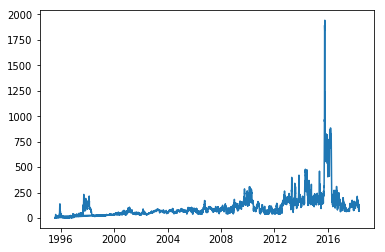

In [435]:
# 5.-- Compute y grafique el precio primedio diario.

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
data = df.copy()
data = data.groupby(['Fecha']).mean()['Precio']
plt.plot(data)

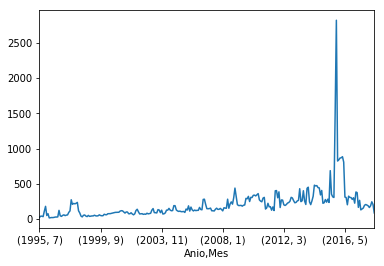

In [255]:
# 6.-- Compute y grafique el precio máximo por mes.

data = df.copy()
data['Fecha'] = pd.to_datetime(data['Fecha'], errors='coerce')
data['Anio'] = data['Fecha'].dt.year
data['Mes'] = data['Fecha'].dt.month
data = data.groupby(['Anio', 'Mes']).max()['Precio']
data.plot()

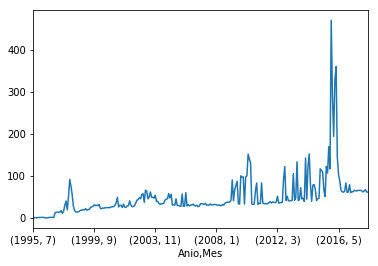

In [256]:
# 7.-- Compute y grafique el precio mínimo mensual.

data = df.copy()
data['Fecha'] = pd.to_datetime(data['Fecha'], errors='coerce')
data['Anio'] = data['Fecha'].dt.year
data['Mes'] = data['Fecha'].dt.month
data = data.groupby(['Anio', 'Mes']).min()['Precio']
data.plot()

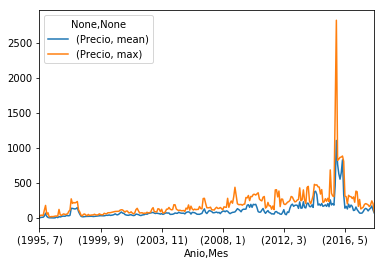

In [264]:
#8.-- Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.
data = df.copy()
data['Fecha'] = pd.to_datetime(data['Fecha'], errors='coerce')
data['Anio'] = data['Fecha'].dt.year
data['Mes'] = data['Fecha'].dt.month
data = data.groupby(['Anio','Mes']).agg(('mean', 'max'))

data.plot()

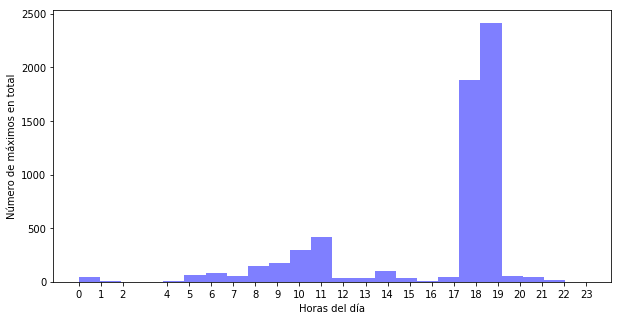

In [419]:
# 9.-- Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.
data = df.copy()
data['Fecha'] = pd.to_datetime(data['Fecha'], errors='coerce')
data['Dia'] = data['Fecha'].dt.day_name()
data = data.loc[data.groupby("Fecha")["Precio"].idxmax()]
data['Hora'] = data['Hora'].astype(int)
data = data.loc[data['Dia'].isin(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])]

data = data[['Hora', 'Precio']].groupby(['Hora']).size().reset_index(name='counts')
x = []

for i, row in data.iterrows():
    for j in range(row['counts']):
        x.append(row['Hora'])
        
num_bins = 24
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.xticks(data['Hora'])
plt.ylabel('Número de máximos en total')
plt.xlabel('Horas del día')
plt.figsize=(22,12)
plt.show()

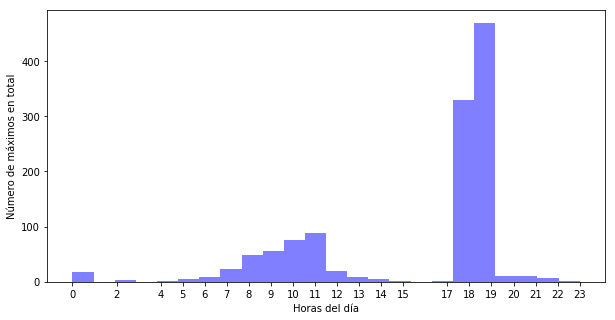

In [418]:
# 10.-- Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.
data = df.copy()
data['Fecha'] = pd.to_datetime(data['Fecha'], errors='coerce')
data['Dia'] = data['Fecha'].dt.day_name()
data = data.loc[data.groupby("Fecha")["Precio"].idxmax()]
data['Hora'] = data['Hora'].astype(int)
data = data.loc[data['Dia'].isin(["Saturday"])]

data = data[['Hora', 'Precio']].groupby(['Hora']).size().reset_index(name='counts')
x = []

for i, row in data.iterrows():
    for j in range(row['counts']):
        x.append(row['Hora'])
        
num_bins = 24
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.xticks(data['Hora'])
plt.ylabel('Número de máximos en total')
plt.xlabel('Horas del día')
plt.figsize=(22,12)
plt.show()

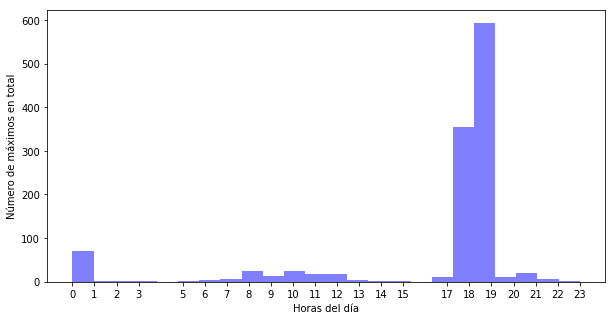

In [420]:
#11.-- Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

data = df.copy()
data['Fecha'] = pd.to_datetime(data['Fecha'], errors='coerce')
data['Dia'] = data['Fecha'].dt.day_name()
data = data.loc[data.groupby("Fecha")["Precio"].idxmax()]
data['Hora'] = data['Hora'].astype(int)
data = data.loc[data['Dia'].isin(["Sunday"])]

data = data[['Hora', 'Precio']].groupby(['Hora']).size().reset_index(name='counts')
x = []

for i, row in data.iterrows():
    for j in range(row['counts']):
        x.append(row['Hora'])
        
num_bins = 24
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.xticks(data['Hora'])
plt.ylabel('Número de máximos en total')
plt.xlabel('Horas del día')
plt.figsize=(22,12)
plt.show()

In [426]:
# 12.-- Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

data = df.copy()
data['Fecha'] = pd.to_datetime(data['Fecha'], errors='coerce')
data['Anio'] = data['Fecha'].dt.year
data = data.loc[data.groupby("Anio")["Precio"].idxmin()]
data = data[["Anio", "Fecha", "Precio"]]
data

,Anio,Fecha,Precio
8,1995,1995-07-28,0.000000
346,1996,1996-06-30,0.000000
17556,1997,1997-07-15,10.882310
1100,1998,1998-07-12,13.847330
51835,1999,1999-03-28,18.359530
52207,2000,2000-03-25,21.531167
27493,2001,2001-08-20,24.822879
2518,2002,2002-04-29,26.777682
2809,2003,2003-02-14,37.013438
11627,2004,2004-03-29,32.252998


In [437]:
# 13.-- Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

data = df.copy()
""""datab = df.copy()
data['Fecha'] = pd.to_datetime(data['Fecha'], errors='coerce')
data['Anio'] = data['Fecha'].dt.year
data['Mes'] = data['Fecha'].dt.month
data = data.groupby(['Anio','Mes']).agg(('mean'))
datab = datab.groupby(['Fecha']).mean()['Precio']
plt.plot(datab)
datab"""

data
#plt.plot(data)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  del sys.path[0]


,Fecha,Hora,Precio
1.409435,NaT,NaN,NaN
4.924333,NaT,NaN,NaN
1.269500,NaT,NaN,NaN
0.953083,NaT,NaN,NaN
4.305917,NaT,NaN,NaN
1.149167,NaT,NaN,NaN
1.108625,NaT,NaN,NaN
0.585958,NaT,NaN,NaN
0.499792,NaT,NaN,NaN
0.927667,NaT,NaN,NaN


In [289]:
So many interesting tools
Researching ability
How can I find a solution

hola mundo


In [ ]:
"""
filenames = !ls precios/*.xls*
filenames

dfs = []
for filename in filenames:
    dfs.append(leer_precios(filename))
dfs= pd.concat(dfs, sort=True)
dfs.size
dfs1 = pd.melt(dfs,id_vars='Fecha')
No existe función para contar duplicados, hay función para eliminarlos, se toma la tabla original, se eliminan duplicados
y se hace la resta original - sin duplicados.
"""

""""
data = df.copy()
datab = df.copy()
data['Fecha'] = pd.to_datetime(data['Fecha'], errors='coerce')
data['Anio-Mes'] = data['Fecha'].dt.year.map(str)+ '-' +data['Fecha'].dt.month.map(str)
#data = data.groupby([data['Fecha'].dt.year, data['Fecha'].dt.month]).max()['Precio']
data = data.groupby(['Anio-Mes']).max()['Precio']

#datab['Fecha'] = pd.to_datetime(datab['Fecha'], errors='coerce')
#datab['Anio-Mes'] = datab['Fecha'].dt.year.map(str)+ '-' +datab['Fecha'].dt.month.map(str)
#datab = datab.groupby(['Anio-Mes']).mean()['Precio']
print(data)
plt.plot(data['Anio-Mes'], data['Precio'],data=data)
#plt.plot(datab)

#data = data.groupby(['Hora']).count()['Precio']
#data = data.groupby(['Hora']).agg(('count'))
#data['Hora'] = data['Hora'].apply(int)
#data['Hora'] = data['Hora'].astype(int)
#print(data)
#data = data.groupby(['Hora']).count()['Hora']

#data = data[['Hora', 'Precio']].groupby(['Hora']).count()['Precio']


"""